In [69]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
from collections import Counter



def cluster_d(g):
    
    def local_c(node):
        return round(nx.clustering(g, node), 2)
    
    size = len(g.node())
    clustering = sorted(list(map(local_c, range(size))))
    count = Counter(clustering)
    
    def count_add(i):
        if i not in count.keys():
            count[i] = 0
            
    irrelevant = list(map(count_add, np.arange(0.01, 1.01, 0.01)))
    
    plt.bar(count.keys(), count.values(), width = 0.01)
    plt.xlabel("Local Clustering Coefficient")
    plt.ylabel("Number of Nodes")
    plt.title("Local Clustering Distribution")
    plt.show()
    plt.clf()
    return


def cluster_dd(g):
    def local_c(node):
        return round(nx.clustering(g, node), 2)
    
    degrees = g.degree()
    size = len(degrees)
    filed = dict([])
    
    def file(n):
        if degrees[n] in filed.keys():
            filed[degrees[n]].append(n)
        else:
            filed[degrees[n]] = [n]
    
    irrelevant = list(map(file, range(size)))
    
    def average(degree):
        degree = np.mean(list(map(local_c, degree)))
        return degree
    
    averaged = list(map(average, filed.values()))
    plt.bar(filed.keys(), averaged)
    plt.ylabel("Mean Local Clustering Coefficient")
    plt.xlabel("Degree of Nodes")
    plt.title("Local Clustering Distribution over Degree")
    plt.show()
    plt.clf()



Average clustering coefficient: 0.6055467186200876
Transitivity: 0.5191742775433075


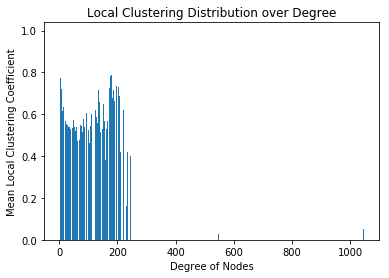

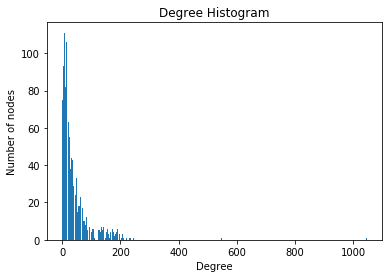

<Figure size 432x288 with 0 Axes>

In [74]:
g = nx.Graph()
with open("facebook_combined.txt") as f:
    edges = f.read().split("\n")
    edges.pop()
    edges = [tuple(map(int, edge.split(" "))) for edge in edges]
g.add_edges_from(edges)

print(f"\nAverage clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
cluster_dd(g)

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values())
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()


Average clustering coefficient: 0.01087797437353141
Transitivity: 0.010893342846020136


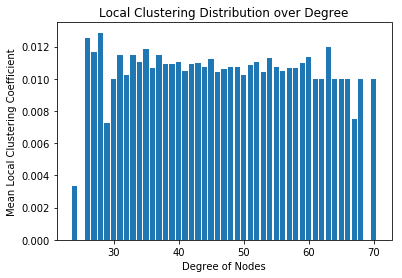

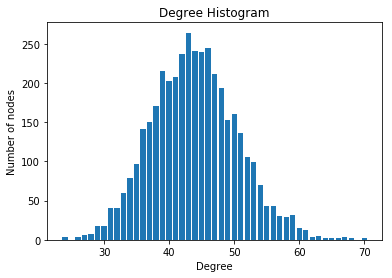

<Figure size 432x288 with 0 Axes>

In [76]:
n = 4039
p = 88234 / (n * (n-1) / 2)

g = nx.erdos_renyi_graph(n, p)

print(f"\nAverage clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
cluster_dd(g)

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values())
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()


Average clustering coefficient: 0.6049154445861379
Transitivity: 0.6032430372779938


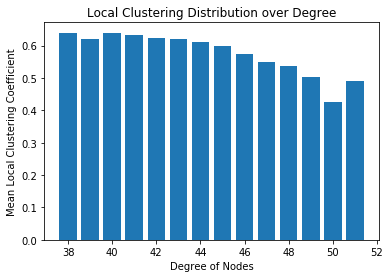

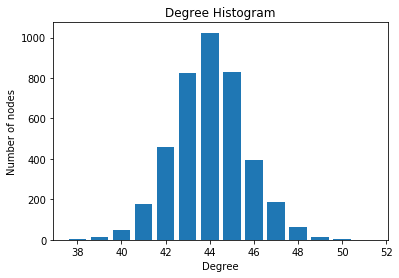

<Figure size 432x288 with 0 Axes>

In [77]:
n = 4039
k = 44
beta = 1 - (0.6055 * (4 * (k-1)) / (3 * (k-2))) ** (1/3)

g = nx.watts_strogatz_graph(n, k, beta)

print(f"\nAverage clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
cluster_dd(g)

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values())
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()


Average clustering coefficient: 0.037793729769210756
Transitivity: 0.03608758902417353


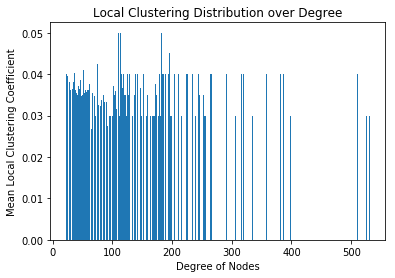

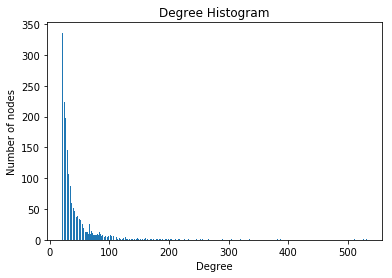

<Figure size 432x288 with 0 Axes>

In [78]:
n = 4039
m = 22

g = nx.barabasi_albert_graph(4039, 22)

print(f"\nAverage clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
cluster_dd(g)

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values())
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()

In [79]:
def klemm_eguiluz(n, m, mu):
    # initial condition of complete graphs with m nodes
    g = nx.complete_graph(m)
    # list used to represent whether or not a node is activated(1) or deactivated(0)
    activation = list(np.ones(m))
    
    for i in range(m, n):
        # generate list of edges which are to be randomly rewired
        mu_factor = np.random.ranf(m) < mu
        activated = [x for x in range(i) if activation[x] == 1]
        targets = set([activated[j] for j in range(m) if mu_factor[j] == 0])
        
        # Linear preferential attachment
        p_total = sum(map(g.degree, range(i)))
        p_dstr = [g.degree(node) / p_total for node in range(i)]
        
        while len(targets) < m:
            targets.add(np.random.choice(list(range(i)), p = p_dstr))
        g.add_edges_from(zip(np.full(m, i), list(targets)))
        
        # Activation and deactivation where p = a / k, and 1/a = sum of 1/k
        
        k = [g.degree(active)**-1 for active in activated]
        a = sum(k)
        p_deact = [l / a for l in k]
        deactivated = np.random.choice(activated, p = p_deact)
        activation[deactivated] = 0
        activation.append(1)
                
    return g


Average clustering coefficient: 0.6045195115025674
Transitivity: 0.2908381358919939


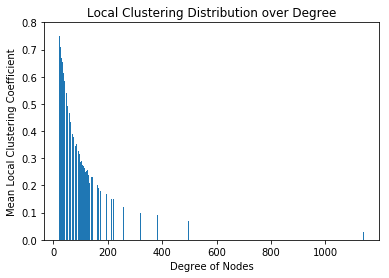

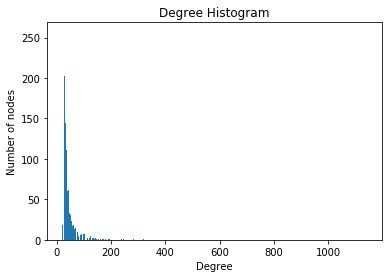

<Figure size 432x288 with 0 Axes>

In [80]:
n = 4039
m = 22
mu = 0.09

g = klemm_eguiluz(n, m, mu)

print(f"\nAverage clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
cluster_dd(g)

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values())
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()

In [82]:
def chang_chang(n, k, phi, chi, delta):
    
    g = nx.Graph()
    
    def post_gen(irrelevant):
        theta, norm = np.random.ranf() * np.pi * 2, np.random.ranf()
        x, y = np.cos(theta) * norm, np.sin(theta) * norm
        return [x, y]
    
    clusters = [[int(i)] for i in range(chi)]
    cluster_b = [tuple(post_gen(1)) for i in clusters]
    posts = cluster_b.copy()
    
    def cluster_b_gen(node):
        return (node, dict(pos = cluster_b[node]))
    
    initial = list(map(cluster_b_gen, range(chi)))
    g.add_nodes_from(initial)
    
    def edge_initialize(node):
        target = np.random.choice(range(chi))
        return (node, target)
    
    edges_initialize = list(map(edge_initialize, range(chi)))
    g.add_edges_from(edges_initialize)
    
    for node in range(chi, n):
        pplns = list(map(len, clusters))
        ppln = list(np.array(pplns) / sum(pplns))
        cluster_add = np.random.choice(range(chi), p = ppln)
        i = cluster_add
        clusters[i].append(node)
        
        def delt_gen(node):
            delt = post_gen(1)
            delt = tuple([delt[0] / delta, delt[1] / delta])
            post = (cluster_b[i][0] + delt[0], cluster_b[i][1] + delt[1])
            posts.append(post)
            return post
        
        g.add_node(node, pos = delt_gen(node))

        def edges(k):
            
            def distance(target):
                dist = ((posts[node][0] - posts[target][0]) ** 2 + (posts[node][1] - posts[target][1]) ** 2)**0.5
                return dist
            
            def pcalc(target):
                d = distance(target)
                return ((g.degree(target)+1)**phi) / d
            
            def p_dist(targets):
                dist = np.array(list(map(pcalc, targets)))
                dist = dist / sum(dist)
                return list(dist)
            
            size_n = np.random.randint(1, k)
                
            available = list(range(0, node))
            targets = np.random.choice(available, p = p_dist(available), size = size_n, replace = False)
            edges_add = list(zip(targets, np.full(len(targets), node)))
        
            return edges_add
    
        g.add_edges_from(edges(k))

    return g



Average clustering coefficient: 0.6152975371467388
Transitivity: 0.037734263493114845


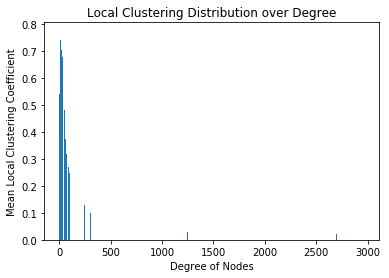

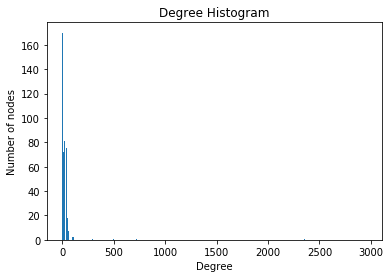

<Figure size 432x288 with 0 Axes>

In [83]:
g = chang_chang(4039, 44, 2, 400, 20)

print(f"\nAverage clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
cluster_dd(g)

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values())
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()

In [84]:
def block(n, p1, p2, zeta = 0.5):
    groups = []

    while sum(groups) < n:
        ppln = np.random.randint(1, n * zeta)
        if ppln + sum(groups) > n:
            ppln = n - sum(groups)
        groups.append(ppln)
        
    edges = np.random.ranf([n, n])
    edges = (edges + edges.T) / 2
    targets = edges.copy()
    targets = targets < (p2*2)
    group = 0
    node = 0
    while group < len(groups):
        append = edges[node:node+groups[group], node:node+groups[group]] < p1 * 2
        targets[node:node+groups[group], node:node+groups[group]] = append
        node = node + groups[group]
        group +=1
    
    print(f"Number of clusters: {len(groups)}")
    g = nx.from_numpy_matrix(targets)
    return g


Number of clusters: 193

Average clustering coefficient: 0.6870044749120287
Transitivity: 0.7183935663795689


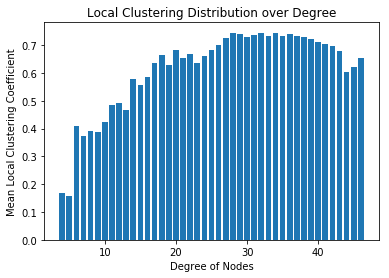

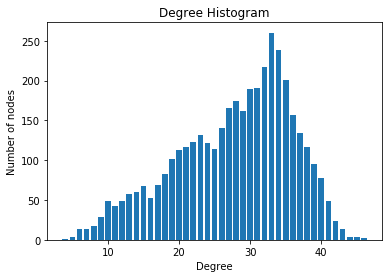

<Figure size 432x288 with 0 Axes>

In [85]:
g = block(4039, 0.4, 0.01, zeta = 0.01)

print(f"\nAverage clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
cluster_dd(g)

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values())
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()

In [86]:
# Function to generate random polar coordinates
def post_gen(t):
    theta, norm = np.random.ranf() * np.pi * 2, np.random.ranf()
    x, y = np.cos(theta) * norm, np.sin(theta) * norm
    return [x, y]

def geometric_graph(n, d):
    g = nx.Graph()
    posts = list(map(post_gen, range(n)))
    
    def node_add(node):
        return (node, dict(pos = posts[node]))
    
    nodes = list(map(node_add, range(n)))
    g.add_nodes_from(nodes)
    
    def edges_add(node):
    
        def distance(target):
            dist = ((posts[node][0] - posts[target][0]) ** 2 + (posts[node][1] - posts[target][1]) ** 2)**0.5
            return dist
        
        distance = np.vectorize(distance)
        dists = distance(range(n))
        targets = np.where(dists < d)[0]
        return zip(targets, np.full(len(targets), node))
    
    edges_add = np.vectorize(edges_add)
    edges = edges_add(range(n))
    for edge in edges:
        g.add_edges_from(edge)
        
    return g



Average clustering coefficient: 0.6122806227638871
Transitivity: 0.7071880152645041


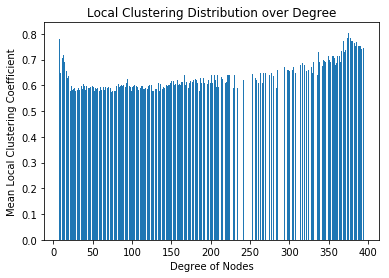

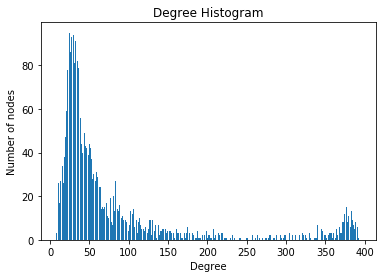

<Figure size 432x288 with 0 Axes>

In [87]:
g = geometric_graph(4039, 0.1)

print(f"\nAverage clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
cluster_dd(g)

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values())
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
plt.clf()